# Lab8:

Wybraƒá trzy metody poszukiwania pierwiastk√≥w: 

* wykorzystujƒÖcƒÖ przedzia≈Ç i zmianƒô znaku, 
* wykorzystujƒÖcƒÖ pochodnƒÖ, 
* wykorzystujƒÖcƒÖ przybli≈ºenie pochodnej

#### 1. Ka≈ºdƒÖ z trzech wybranych metod przetestowaƒá (ilo≈õƒá iteracji, ilo≈õƒá wywo≈Ça≈Ñ funkcji) na sze≈õciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawiƒá w formie tabelki. <b>Pamiƒôtaƒá o sprawdzeniu czy wynik jest poprawny poprzez obliczenie warto≈õci funkcji dla znalezionego pierwiastka !</b> (3 pkt)

In [1]:
using Roots
using Plots
using ForwardDiff
using Suppressor
using DataFrames

In [2]:
# falsi method
function intervalMethod(f, a, b)
    t = Roots.Tracks(Float64, Float64)
    find_zero(f, (a, b), FalsePosition(), verbose=true)
    return t
end


# Newton method
function derivativeMethod(f, startX)
    D(f) = x -> ForwardDiff.derivative(f, float(x))
    t = Roots.Tracks(Float64, Float64)
    find_zero((f, D(f)), startX, Roots.Newton(),verbose=true, tracks=t)
    return t
end


# secants method
function derivativeApproxMethod(f, startX)
    t = Roots.Tracks(Float64, Float64)
    find_zero(f, startX, verbose=true)
    return t
end

derivativeApproxMethod (generic function with 1 method)

In [3]:
# function testMethod(dataframe, method, f, startX, method_name, f_name)
#     io = open("log.txt", "w+")
#     out = @capture_out begin print(method(f, startX)) end
#     write(io, out)
#     close(io)
#     lines = readlines("log.txt")
#     iter = parse(Int64, lines[5][15:end])
#     eval = parse(Int64, lines[6][28:end])
#     x = lines[end - 1][8:end]
#     i = 1
#     while x[i] != ','
#         i += 1
#     end
#     zero = parse(Float64, x[1:(i-1)])
#     zero_val = f(zero)
#     push!(dataframe, [f_name method_name iter eval zero_val])
# end

In [4]:
f1(x) = sin(x) - x / 2
f2(x) = 2 * x - exp(-x)
f3(x) = x * exp(-x)
f4(x) = exp(x) - 1 / (10 * x) ^ 2
f5(x) = (x + 3) * (x - 1) ^ 2
f6(x) = x ^ 3

function test(f, a, b)
    intervalMethod(f, a, b)
    derivativeMethod(f, (a + b) / 2)
    derivativeApproxMethod(f, (a + b) / 2)
end

df = DataFrame(func = String[], method = String[], iterations = Int64[], evaluations = Int64[], zero_value = Bool[])

0√ó5 DataFrame

In [5]:
test(f1, 0, 10)

Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 10
* function evaluations ‚âà 12
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 10,	 fx‚ÇÇ = -5.5440211108893696
x‚ÇÉ = 5,	 fx‚ÇÉ = -3.4589242746631386
x‚ÇÑ = 2.5,	 fx‚ÇÑ = -0.65152785589604356
x‚ÇÖ = 1.25,	 fx‚ÇÖ = 0.3239846193555862
x‚ÇÜ = 1.6651466890159652,	 fx‚ÇÜ = 0.16297896098014875
x‚Çá = 1.9446763851217526,	 fx‚Çá = -0.041420950418796343
x‚Çà = 1.8880306380481127,	 fx‚Çà = 0.0060864607812989302
x‚Çâ = 1.8952878661159387,	 fx‚Çâ = 0.00016902681276442788
x‚ÇÅ‚ÇÄ = 1.8954942966408586,	 fx‚ÇÅ‚ÇÄ = -2.4248700047913019e-08
x‚ÇÅ‚ÇÅ = 1.8954942670304449,	 fx‚ÇÅ‚ÇÅ = 2.8961277820371834e-12
x‚ÇÅ‚ÇÇ = 1.8954942670339809,	 fx‚ÇÅ‚ÇÇ = 0



Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: Roots.Newton()
* iterations: 6
* function evaluations ‚âà 12
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 5,	 fx‚ÇÅ = -3.4589242746631386
x‚ÇÇ = -10.988532943579219,	 fx‚ÇÇ = 6.4942416816294779
x‚ÇÉ = 1.8195792624869025,	 fx‚ÇÉ = 0.059423179322815045
x‚ÇÑ = 1.899211029513324,	 fx‚ÇÑ = -0.003050655692591997
x‚ÇÖ = 1.8955022189114259,	 fx‚ÇÖ = -6.5127967007194698e-06
x‚ÇÜ = 1.8954942670705659,	 fx‚ÇÜ = -2.9963920233910812e-11
x‚Çá = 1.8954942670339809,	 fx‚Çá = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 2
* function evaluations ‚âà 4
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [-10.988747528500655,5.0]

Trace:
x‚ÇÅ = 5.0000060556377948,	 fx‚ÇÅ = -3.4589255847090024
x‚ÇÇ = 5,	 fx‚ÇÇ = -3.4589242746631386
x‚ÇÉ = -10.988747528500655,	 fx‚ÇÉ = 6.4943504620211705
(a‚ÇÉ, b‚ÇÉ) = ( -10.988747528500655, 5 )
(a‚ÇÑ, b‚ÇÑ) = ( 0, 5 )



Algorithm has not been run

In [6]:
push!(df, ["sin(x) - x / 2" "interval" 10 12 iszero(f1(1.895494267033981))])
push!(df, ["sin(x) - x / 2" "derivative" 6 12 iszero(f1(1.895494267033981))])
push!(df, ["sin(x) - x / 2" "derivativeApprox" 2 4 iszero(f1(0.0))])

3√ó5 DataFrame
 Row ‚îÇ func            method            iterations  evaluations  zero_value 
     ‚îÇ String          String            Int64       Int64        Bool       
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x / 2  interval                  10           12        true
   2 ‚îÇ sin(x) - x / 2  derivative                 6           12        true
   3 ‚îÇ sin(x) - x / 2  derivativeApprox           2            4        true

In [7]:
test(f2, -0.1, 3)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations ‚âà 8
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = -1
x‚ÇÇ = 3,	 fx‚ÇÇ = 5.9502129316321364
x‚ÇÉ = 0.43164145178146418,	 fx‚ÇÉ = 0.21384071227717771
x‚ÇÑ = 0.35327968187736314,	 fx‚ÇÑ = 0.0041786410100026483
x‚ÇÖ = 0.35172477734461571,	 fx‚ÇÖ = -2.4152548061651125e-05
x‚ÇÜ = 0.35173371304558215,	 fx‚ÇÜ = 4.8564718913013394e-09
x‚Çá = 0.35173371124919794,	 fx‚Çá = 5.773159728050814e-15
x‚Çà = 0.35173371124919584,	 fx‚Çà = 0



Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ‚âà 10
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 1.45,	 fx‚ÇÅ = 2.665429711906202
x‚ÇÇ = 0.25718466270311424,	 fx‚ÇÇ = -0.25885608927960191
x‚ÇÉ = 0.35052582707756769,	 fx‚ÇÉ = -0.0032659888887462962
x‚ÇÑ = 0.35173352133535846,	 fx‚ÇÑ = -5.1342588514025067e-07
x‚ÇÖ = 0.35173371124919117,	 fx‚ÇÖ = -1.2545520178264269e-14
x‚ÇÜ = 0.35173371124919584,	 fx‚ÇÜ = 0



Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ‚âà 9
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [0.25718428360732837,1.45]

Trace:
x‚ÇÅ = 1.4500060555076217,	 fx‚ÇÅ = 2.6654432433593125
x‚ÇÇ = 1.45,	 fx‚ÇÇ = 2.665429711906202
x‚ÇÉ = 0.25718428360732837,	 fx‚ÇÉ = -0.25885714059772547
(a‚ÇÉ, b‚ÇÉ) = ( 0.25718428360732837, 1.45 )
(a‚ÇÑ, b‚ÇÑ) = ( 0.25718428360732837, 0.6196842836073283 )
(a‚ÇÖ, b‚ÇÖ) = ( 0.35173278625731053, 0.35173466003497172 )
(a‚ÇÜ, b‚ÇÜ) = ( 0.35173278625731053, 0.35173371124919584 )



Algorithm has not been run

In [8]:
push!(df, ["2 * x - exp(-x)" "interval" 6 8 iszero(f2(0.35173371124919584))])
push!(df, ["2 * x - exp(-x)" "derivative" 5 1 iszero(f2(0.35173371124919584))])
push!(df, ["2 * x - exp(-x)" "derivativeApprox" 4 9 iszero(f2(0.35173371124919584))])

6√ó5 DataFrame
 Row ‚îÇ func             method            iterations  evaluations  zero_value 
     ‚îÇ String           String            Int64       Int64        Bool       
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x / 2   interval                  10           12        true
   2 ‚îÇ sin(x) - x / 2   derivative                 6           12        true
   3 ‚îÇ sin(x) - x / 2   derivativeApprox           2            4        true
   4 ‚îÇ 2 * x - exp(-x)  interval                   6            8        true
   5 ‚îÇ 2 * x - exp(-x)  derivative                 5            1        true
   6 ‚îÇ 2 * x - exp(-x)  derivativeApprox           4            9        true

In [9]:
test(f3, -0.1, 3)

Results of univariate zero finding:

* Converged to: 2.7284841053187847e-12
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 40
* function evaluations ‚âà 42

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 3,	 fx‚ÇÇ = 0.14936120510359183
x‚ÇÉ = 1.5,	 fx‚ÇÉ = 0.33469524022264474
x‚ÇÑ = 0.75,	 fx‚ÇÑ = 0.35427491455576099
x‚ÇÖ = 0.375,	 fx‚ÇÖ = 0.25773347954661457
x‚ÇÜ = 0.1875,	 fx‚ÇÜ = 0.15544295965882507
x‚Çá = 0.09375,	 fx‚Çá = 0.085360346379378199
x‚Çà = 0.046875,	 fx‚Çà = 0.044728437467305704
x‚Çâ = 0.0234375,	 fx‚Çâ = 0.02289457089726708
x‚ÇÅ‚ÇÄ = 0.01171875,	 fx‚ÇÅ‚ÇÄ = 0.011582222427115372
x‚ÇÅ‚ÇÅ = 0.005859375,	 fx‚ÇÅ‚ÇÅ = 0.0058251431112840112
x‚ÇÅ‚ÇÇ = 0.0029296875,	 fx‚ÇÅ‚ÇÇ = 0.0029211169917379102
x‚ÇÅ‚ÇÉ = 0.00146484375,	 fx‚ÇÅ‚ÇÉ = 0.0014626995536278255
x‚ÇÅ‚ÇÑ = 0.000732421875,	 fx‚ÇÅ‚ÇÑ = 0.00073188562959992421
x‚ÇÅ‚ÇÖ = 0.0003662109375,	 fx‚ÇÅ‚ÇÖ = 0.00036607685160261499
x‚ÇÅ‚ÇÜ = 0.00018310546875,	 fx‚ÇÅ‚ÇÜ = 0.00018307194420667111
x‚ÇÅ‚Çá = 9.1552734375e-05,	 fx‚ÇÅ‚Çá 

Results of univariate zero finding:

* Converged to: 34.79256836061439
* Algorithm: Roots.Newton()
* iterations: 29
* function evaluations ‚âà 58
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 1.45,	 fx‚ÇÅ = 0.34012691773600656
x‚ÇÇ = 4.6722222222222225,	 fx‚ÇÇ = 0.043692124385243405
x‚ÇÉ = 5.9445368969574721,	 fx‚ÇÉ = 0.015575372972062103
x‚ÇÑ = 7.1467803063686404,	 fx‚ÇÑ = 0.0056273403348987448
x‚ÇÖ = 8.309467103383966,	 fx‚ÇÖ = 0.0020455846790544577
x‚ÇÜ = 9.4462759823153792,	 fx‚ÇÜ = 0.00074609666051108996
x‚Çá = 10.564671355861517,	 fx‚Çá = 0.00027269521578226395
x‚Çà = 11.669222778779689,	 fx‚Çà = 9.9807429389972473e-05
x‚Çâ = 12.762950318332891,	 fx‚Çâ = 3.6565556094586889e-05
x‚ÇÅ‚ÇÄ = 13.847963004175954,	 fx‚ÇÅ‚ÇÄ = 1.3405776552778735e-05
x‚ÇÅ‚ÇÅ = 14.925796354075466,	 fx‚ÇÅ‚ÇÅ = 4.9175243294895016e-06
x‚ÇÅ‚ÇÇ = 15.997605532852329,	 fx‚ÇÅ‚ÇÇ = 1.80460924206137e-06
x‚ÇÅ‚ÇÉ = 17.064282843294286,	 fx‚ÇÅ‚ÇÉ = 6.624668707023485e-07
x‚ÇÅ‚ÇÑ = 1

Results of univariate zero finding:

* Converged to: 31.341791410696633
* Algorithm: Secant()
* iterations: 39
* function evaluations ‚âà 43

Trace:
x‚ÇÅ = 1.4500060555076217,	 fx‚ÇÅ = 0.34012627853466587
x‚ÇÇ = 1.45,	 fx‚ÇÇ = 0.34012691773600656
x‚ÇÉ = 1.4506055507621782,	 fx‚ÇÉ = 0.34006297419780562
x‚ÇÑ = 1.5111606269800058,	 fx‚ÇÑ = 0.33344323291671391
x‚ÇÖ = 4.5613826109214148,	 fx‚ÇÖ = 0.047655519127317109
x‚ÇÜ = 5.0700115865022255,	 fx‚ÇÜ = 0.031851573854667269
x‚Çá = 6.0951121611272594,	 fx‚Çá = 0.013737513229807253
x‚Çà = 6.8725376648526701,	 fx‚Çà = 0.0071188844564845418
x‚Çâ = 7.7087233045206114,	 fx‚Çâ = 0.0034604012784272865
x‚ÇÅ‚ÇÄ = 8.4996351976965201,	 fx‚ÇÅ‚ÇÄ = 0.0017300379175748646
x‚ÇÅ‚ÇÅ = 9.2903983377465842,	 fx‚ÇÅ‚ÇÅ = 0.0008575621463104867
x‚ÇÅ‚ÇÇ = 10.067644603991686,	 fx‚ÇÅ‚ÇÇ = 0.00042717455818358242
x‚ÇÅ‚ÇÉ = 10.839088389877983,	 fx‚ÇÅ‚ÇÉ = 0.00021263584690955938
x‚ÇÅ‚ÇÑ = 11.603689807407386,	 fx‚ÇÅ‚ÇÑ = 0.0001059687124457269
x‚ÇÅ‚ÇÖ = 12.363284861282592,	 f

Algorithm has not been run

In [10]:
push!(df, ["x * exp(-x)" "interval" 40 42 iszero(f3(2.7284841053187847e-12))])
push!(df, ["x * exp(-x)" "derivative" 29 58 iszero(f3(34.79256836061439))])
push!(df, ["x * exp(-x)" "derivativeApprox" 39 43 iszero(f3(31.341791410696633))])

9√ó5 DataFrame
 Row ‚îÇ func             method            iterations  evaluations  zero_value 
     ‚îÇ String           String            Int64       Int64        Bool       
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x / 2   interval                  10           12        true
   2 ‚îÇ sin(x) - x / 2   derivative                 6           12        true
   3 ‚îÇ sin(x) - x / 2   derivativeApprox           2            4        true
   4 ‚îÇ 2 * x - exp(-x)  interval                   6            8        true
   5 ‚îÇ 2 * x - exp(-x)  derivative                 5            1        true
   6 ‚îÇ 2 * x - exp(-x)  derivativeApprox           4            9        true
   7 ‚îÇ x * exp(-x)      interval                  40           42       false
   8 ‚îÇ x * exp(-x)      derivative                29           58       false
   9 ‚îÇ x * exp(-x)      derivativeApprox          39           43       false

In [11]:
test(f4, -0.1, 3)

Results of univariate zero finding:

* Converged to: 0.09534461720025875
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 10
* function evaluations ‚âà 12
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = -Inf
x‚ÇÇ = 3,	 fx‚ÇÇ = 20.084425812076557
x‚ÇÉ = 1.5,	 fx‚ÇÉ = 4.4772446258936203
x‚ÇÑ = 0.75,	 fx‚ÇÑ = 2.0992222388348969
x‚ÇÖ = 0.375,	 fx‚ÇÖ = 1.3838803035070901
x‚ÇÜ = 0.1875,	 fx‚ÇÜ = 0.92178580497653617
x‚Çá = 0.09375,	 fx‚Çá = -0.039492637469952019
x‚Çà = 0.097601573695323046,	 fx‚Çà = 0.052772271718954267
x‚Çâ = 0.09539860947651034,	 fx‚Çâ = 0.0013042087236161404
x‚ÇÅ‚ÇÄ = 0.095344614346001763,	 fx‚ÇÅ‚ÇÄ = -6.9001735436557965e-08
x‚ÇÅ‚ÇÅ = 0.095344617202569537,	 fx‚ÇÅ‚ÇÅ = 5.5863313974668927e-11
x‚ÇÅ‚ÇÇ = 0.095344617200258747,	 fx‚ÇÅ‚ÇÇ = 0



Results of univariate zero finding:

* Converged to: -8.999510577046975
* Algorithm: Roots.Newton()
* iterations: 15
* function evaluations ‚âà 30
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 1.45,	 fx‚ÇÅ = 4.2583582726004456
x‚ÇÇ = 0.45265045408460269,	 fx‚ÇÇ = 1.5236683413631751
x‚ÇÉ = -0.39945571970072391,	 fx‚ÇÉ = 0.60801455195517051
x‚ÇÑ = -2.1030269847408563,	 fx‚ÇÑ = 0.11982526421454857
x‚ÇÖ = -3.1021034212118881,	 fx‚ÇÖ = 0.043915372489547751
x‚ÇÜ = -4.093766587404513,	 fx‚ÇÜ = 0.016079605376222272
x‚Çá = -5.0751406464580437,	 fx‚Çá = 0.0058619641283489416
x‚Çà = -6.0365582114945839,	 fx‚Çà = 0.0021153464114492941
x‚Çâ = -6.9567343877058256,	 fx‚Çâ = 0.0007455730298835567
x‚ÇÅ‚ÇÄ = -7.7918321618732067,	 fx‚ÇÅ‚ÇÄ = 0.00024838500861563712
x‚ÇÅ‚ÇÅ = -8.4616627702322891,	 fx‚ÇÅ‚ÇÅ = 7.1754917167090855e-05
x‚ÇÅ‚ÇÇ = -8.8638563273265714,	 fx‚ÇÅ‚ÇÇ = 1.4130329273074981e-05
x‚ÇÅ‚ÇÉ = -8.9892472763235158,	 fx‚ÇÅ‚ÇÉ = 9.9163671682652517e-07
x‚ÇÅ‚Ç

Results of univariate zero finding:

* Converged to: -0.1054119671030927
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 10
* function evaluations ‚âà 19
* stopped as x_n ‚âà x_{n-1} using atol=xatol, rtol=xrtol
* Note: Used bracketing method AlefeldPotraShi() on  [-0.12566503725349248,-0.0601004196495252]

Trace:
x‚ÇÅ = 1.4500060555076217,	 fx‚ÇÅ = 4.2583841277269547
x‚ÇÇ = 1.45,	 fx‚ÇÇ = 4.2583582726004456
x‚ÇÉ = 1.4493944492378217,	 fx‚ÇÉ = 4.2557735467176316
x‚ÇÑ = 1.3888393730199942,	 fx‚ÇÑ = 4.0050086431143113
x‚ÇÖ = 0.4217040197391061,	 fx‚ÇÖ = 1.4683250911139574
x‚ÇÜ = -0.13810924691997906,	 fx‚ÇÜ = 0.34673416146652281
x‚Çá = -0.0601004196495252,	 fx‚Çá = -1.8268329862689709
x‚Çà = -0.12566503725349248,	 fx‚Çà = 0.24866622213046985
(a‚Çà, b‚Çà) = ( -0.12566503725349248, -0.0601004196495252 )
(a‚Çâ, b‚Çâ) = ( -0.12566503725349248, -0.091516678962898321 )
(a‚ÇÅ‚ÇÄ, b‚ÇÅ‚ÇÄ) = ( -0.10573290860416007, -0.10521560749665863 )
(a‚ÇÅ‚ÇÅ, b‚ÇÅ‚ÇÅ) 

Algorithm has not been run

In [12]:
push!(df, ["exp(x) - 1 / (10 * x) ^ 2" "interval" 10 12 iszero(f4(0.09534461720025875))])
push!(df, ["exp(x) - 1 / (10 * x) ^ 2" "derivative" 15 30 iszero(f4(-8.999510577046975))])
push!(df, ["exp(x) - 1 / (10 * x) ^ 2" "derivativeApprox" 10 19 iszero(f4(-0.1054119671030927))])

12√ó5 DataFrame
 Row ‚îÇ func                       method            iterations  evaluations  z ‚ãØ
     ‚îÇ String                     String            Int64       Int64        B ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x / 2             interval                  10           12    ‚ãØ
   2 ‚îÇ sin(x) - x / 2             derivative                 6           12
   3 ‚îÇ sin(x) - x / 2             derivativeApprox           2            4
   4 ‚îÇ 2 * x - exp(-x)            interval                   6            8
   5 ‚îÇ 2 * x - exp(-x)            derivative                 5            1    ‚ãØ
   6 ‚îÇ 2 * x - exp(-x)            derivativeApprox           4            9
   7 ‚îÇ x * exp(-x)                interval                  40           42
   8 ‚îÇ x * exp(-x)                derivative                29           58
   9 ‚îÇ x * exp(-x)                derivativeApprox          39           43    ‚ãØ
  10 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  interval                  10           12
  11 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  derivative                15           30
  12 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  derivativeApprox          10           19
                                                                1 column omitted

In [13]:
test(f5, -5, 3)

Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 11
* function evaluations ‚âà 13
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = -5,	 fx‚ÇÅ = -72
x‚ÇÇ = 0,	 fx‚ÇÇ = 3
x‚ÇÉ = -0.20000000000000001,	 fx‚ÇÉ = 4.032
x‚ÇÑ = -0.68345323741007191,	 fx‚ÇÑ = 6.5651278159709161
x‚ÇÖ = -1.837067475948414,	 fx‚ÇÖ = 9.3603879061063484
x‚ÇÜ = -3.4495756373972446,	 fx‚ÇÜ = -8.9010236710403134
x‚Çá = -2.6636028086174672,	 fx‚Çá = 4.5151182382007846
x‚Çà = -2.9281170242512058,	 fx‚Çà = 1.1091617453559861
x‚Çâ = -3.0020448415419576,	 fx‚Çâ = -0.032750924237028724
x‚ÇÅ‚ÇÄ = -2.9999245354909165,	 fx‚ÇÅ‚ÇÄ = 0.0012073865866281867
x‚ÇÅ‚ÇÅ = -2.999999922900463,	 fx‚ÇÅ‚ÇÅ = 1.2335925440770963e-06
x‚ÇÅ‚ÇÇ = -3.0000000000000022,	 fx‚ÇÅ‚ÇÇ = -3.5527136788005041e-14
x‚ÇÅ‚ÇÉ = -3,	 fx‚ÇÅ‚ÇÉ = 0



Results of univariate zero finding:

* Converged to: 1.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ‚âà 2
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = -1,	 fx‚ÇÅ = 8
x‚ÇÇ = 1,	 fx‚ÇÇ = 0



Results of univariate zero finding:

* Converged to: 0.9999999903057905
* Algorithm: Secant()
* iterations: 36
* function evaluations ‚âà 40
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = -0.99999394450887913,	 fx‚ÇÅ = 7.9999757779621783
x‚ÇÇ = -1,	 fx‚ÇÇ = 8
x‚ÇÉ = -0.9993944508879129,	 fx‚ÇÉ = 7.9975770703942457
x‚ÇÑ = -0.93883953967920286,	 fx‚ÇÑ = 7.7481057318379953
x‚ÇÖ = 0.9418809364381604,	 fx‚ÇÖ = 0.013314986139419735
x‚ÇÜ = 0.94511848582959701,	 fx‚ÇÜ = 0.01188262033469443
x‚Çá = 0.97197654827869329,	 fx‚Çá = 0.00311924818084563
x‚Çà = 0.98153644839072807,	 fx‚Çà = 0.0013573166768156661
x‚Çâ = 0.9889009865813887,	 fx‚Çâ = 0.00049138512910372239
x‚ÇÅ‚ÇÄ = 0.99308009815108389,	 fx‚ÇÅ‚ÇÄ = 0.00019120880660663657
x‚ÇÅ‚ÇÅ = 0.99574214334262345,	 fx‚ÇÅ‚ÇÅ = 7.2440181113936475e-05
x‚ÇÅ‚ÇÇ = 0.99736579634869837,	 fx‚ÇÅ‚ÇÇ = 2.7737836690920217e-05
x‚ÇÅ‚ÇÉ = 0.99837327420039779,	 fx‚ÇÅ‚ÇÉ = 1.0580642606647353e-05
x‚ÇÅ‚ÇÑ = 0.99899457410704839,	 fx‚

Algorithm has not been run

In [14]:
push!(df, ["(x + 3) * (x - 1) ^ 2" "interval" 11 13 iszero(f5(-3.0))])
push!(df, ["(x + 3) * (x - 1) ^ 2" "derivative" 1 2 iszero(f5(1.0))])
push!(df, ["(x + 3) * (x - 1) ^ 2" "derivativeApprox" 36 40 iszero(f5(0.9999999903057905))])

15√ó5 DataFrame
 Row ‚îÇ func                       method            iterations  evaluations  z ‚ãØ
     ‚îÇ String                     String            Int64       Int64        B ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x / 2             interval                  10           12    ‚ãØ
   2 ‚îÇ sin(x) - x / 2             derivative                 6           12
   3 ‚îÇ sin(x) - x / 2             derivativeApprox           2            4
   4 ‚îÇ 2 * x - exp(-x)            interval                   6            8
   5 ‚îÇ 2 * x - exp(-x)            derivative                 5            1    ‚ãØ
   6 ‚îÇ 2 * x - exp(-x)            derivativeApprox           4            9
   7 ‚îÇ x * exp(-x)                interval                  40           42
   8 ‚îÇ x * exp(-x)                derivative                29           58
   9 ‚îÇ x * exp(-x)                derivativeApprox          39           43    ‚ãØ
  10 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  interval                  10           12
  11 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  derivative                15           30
  12 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  derivativeApprox          10           19
  13 ‚îÇ (x + 3) * (x - 1) ^ 2      interval                  11           13    ‚ãØ
  14 ‚îÇ (x + 3) * (x - 1) ^ 2      derivative                 1            2
  15 ‚îÇ (x + 3) * (x - 1) ^ 2      derivativeApprox          36           40
                                                                1 column omitted

In [15]:
test(f6, -0.1, 3)

Results of univariate zero finding:

* Converged to: 5.7220458984375e-6
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 19
* function evaluations ‚âà 21
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 3,	 fx‚ÇÇ = 27
x‚ÇÉ = 1.5,	 fx‚ÇÉ = 3.375
x‚ÇÑ = 0.75,	 fx‚ÇÑ = 0.421875
x‚ÇÖ = 0.375,	 fx‚ÇÖ = 0.052734375
x‚ÇÜ = 0.1875,	 fx‚ÇÜ = 0.006591796875
x‚Çá = 0.09375,	 fx‚Çá = 0.000823974609375
x‚Çà = 0.046875,	 fx‚Çà = 0.000102996826171875
x‚Çâ = 0.0234375,	 fx‚Çâ = 1.2874603271484375e-05
x‚ÇÅ‚ÇÄ = 0.01171875,	 fx‚ÇÅ‚ÇÄ = 1.6093254089355469e-06
x‚ÇÅ‚ÇÅ = 0.005859375,	 fx‚ÇÅ‚ÇÅ = 2.0116567611694336e-07
x‚ÇÅ‚ÇÇ = 0.0029296875,	 fx‚ÇÅ‚ÇÇ = 2.514570951461792e-08
x‚ÇÅ‚ÇÉ = 0.00146484375,	 fx‚ÇÅ‚ÇÉ = 3.14321368932724e-09
x‚ÇÅ‚ÇÑ = 0.000732421875,	 fx‚ÇÅ‚ÇÑ = 3.92901711165905e-10
x‚ÇÅ‚ÇÖ = 0.0003662109375,	 fx‚ÇÅ‚ÇÖ = 4.9112713895738125e-11
x‚ÇÅ‚ÇÜ = 0.00018310546875,	 fx‚ÇÅ‚ÇÜ = 6.1390892369672656e-12
x‚ÇÅ‚Çá = 9.1552734375e-05

Results of univariate zero finding:

* Converged to: 7.561887823727517e-6
* Algorithm: Roots.Newton()
* iterations: 30
* function evaluations ‚âà 60
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 1.45,	 fx‚ÇÅ = 3.0486249999999999
x‚ÇÇ = 0.96666666666666656,	 fx‚ÇÇ = 0.90329629629629593
x‚ÇÉ = 0.64444444444444438,	 fx‚ÇÉ = 0.26764334705075438
x‚ÇÑ = 0.42962962962962958,	 fx‚ÇÑ = 0.079301732459482785
x‚ÇÖ = 0.28641975308641976,	 fx‚ÇÖ = 0.023496809617624535
x‚ÇÜ = 0.19094650205761315,	 fx‚ÇÜ = 0.0069620176644813424
x‚Çá = 0.12729766803840875,	 fx‚Çá = 0.0020628200487352115
x‚Çà = 0.084865112025605843,	 fx‚Çà = 0.00061120594036598883
x‚Çâ = 0.056576741350403893,	 fx‚Çâ = 0.00018109805640473739
x‚ÇÅ‚ÇÄ = 0.037717827566935931,	 fx‚ÇÅ‚ÇÄ = 5.3658683379181463e-05
x‚ÇÅ‚ÇÅ = 0.025145218377957287,	 fx‚ÇÅ‚ÇÅ = 1.5898869149387098e-05
x‚ÇÅ‚ÇÇ = 0.016763478918638192,	 fx‚ÇÅ‚ÇÇ = 4.7107760442628451e-06
x‚ÇÅ‚ÇÉ = 0.011175652612425462,	 fx‚ÇÅ‚ÇÉ = 1.39578549459639

Results of univariate zero finding:

* Converged to: 3.898782395042023e-5
* Algorithm: Secant()
* iterations: 39
* function evaluations ‚âà 43

Trace:
x‚ÇÅ = 1.4500060555076217,	 fx‚ÇÅ = 3.0486631952738352
x‚ÇÇ = 1.45,	 fx‚ÇÇ = 3.0486249999999999
x‚ÇÉ = 1.4493944492378217,	 fx‚ÇÉ = 3.0448070834545162
x‚ÇÑ = 1.3888393730199942,	 fx‚ÇÑ = 2.6788972734916583
x‚ÇÖ = 0.94550381830369923,	 fx‚ÇÖ = 0.84525911176609236
x‚ÇÜ = 0.74113775251393832,	 fx‚ÇÜ = 0.40709597505003486
x‚Çá = 0.55126189156551697,	 fx‚Çá = 0.16752279601613848
x‚Çà = 0.41849020464162057,	 fx‚Çà = 0.073291885002144688
x‚Çâ = 0.31522167943207596,	 fx‚Çâ = 0.031321909874810157
x‚ÇÅ‚ÇÄ = 0.23815307432319938,	 fx‚ÇÅ‚ÇÄ = 0.013507300959745089
x‚ÇÅ‚ÇÅ = 0.17971851374898304,	 fx‚ÇÅ‚ÇÅ = 0.0058046823007328625
x‚ÇÅ‚ÇÇ = 0.13568231326547711,	 fx‚ÇÅ‚ÇÇ = 0.0024978693437557116
x‚ÇÅ‚ÇÉ = 0.10241866133404737,	 fx‚ÇÅ‚ÇÉ = 0.0010743289657977838
x‚ÇÅ‚ÇÑ = 0.077314979463488906,	 fx‚ÇÅ‚ÇÑ = 0.00046215848895325831
x‚ÇÅ‚ÇÖ = 0.05836293894650206,

Algorithm has not been run

In [16]:
push!(df, ["x^3" "interval" 19 21 iszero(f6(5.7220458984375e-6))])
push!(df, ["x^3" "derivative" 30 60 iszero(f6(7.561887823727517e-6))])
push!(df, ["x^3" "derivativeApprox" 39 43 iszero(f6(3.898782395042023e-5))])

18√ó5 DataFrame
 Row ‚îÇ func                       method            iterations  evaluations  z ‚ãØ
     ‚îÇ String                     String            Int64       Int64        B ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x / 2             interval                  10           12    ‚ãØ
   2 ‚îÇ sin(x) - x / 2             derivative                 6           12
   3 ‚îÇ sin(x) - x / 2             derivativeApprox           2            4
   4 ‚îÇ 2 * x - exp(-x)            interval                   6            8
   5 ‚îÇ 2 * x - exp(-x)            derivative                 5            1    ‚ãØ
   6 ‚îÇ 2 * x - exp(-x)            derivativeApprox           4            9
   7 ‚îÇ x * exp(-x)                interval                  40           42
   8 ‚îÇ x * exp(-x)                derivative                29           58
   9 ‚îÇ x * exp(-x)                derivativeApprox          39           43    ‚ãØ
  10 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  interval                  10           12
  11 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  derivative                15           30
  12 ‚îÇ exp(x) - 1 / (10 * x) ^ 2  derivativeApprox          10           19
  13 ‚îÇ (x + 3) * (x - 1) ^ 2      interval                  11           13    ‚ãØ
  14 ‚îÇ (x + 3) * (x - 1) ^ 2      derivative                 1            2
  15 ‚îÇ (x + 3) * (x - 1) ^ 2      derivativeApprox          36           40
  16 ‚îÇ x^3                        interval                  19           21
  17 ‚îÇ x^3                        derivative                30           60    ‚ãØ
  18 ‚îÇ x^3                        derivativeApprox          39           43
                                                                1 column omitted

#### 2. Zademonstrowaƒá wybrany, ciekawy przyk≈Çad trudnej funkcji z p.1 i dzia≈Çania metod na niej. (1 pkt)

$$f(x) = e^x -2 - \frac{1}{(10x)^2} + \frac{2}{(100x)^3}$$

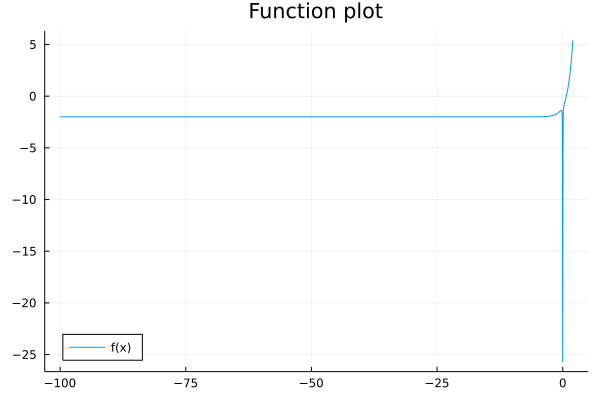

In [17]:
f(x) = exp(x) -2 -1 / (10*x)^2 + 2 / (100*x)^3
D(f) = x -> ForwardDiff.derivative(f, float(x))

plot(f, -100, 2, label="f(x)", legend=:bottomleft, title="Function plot")

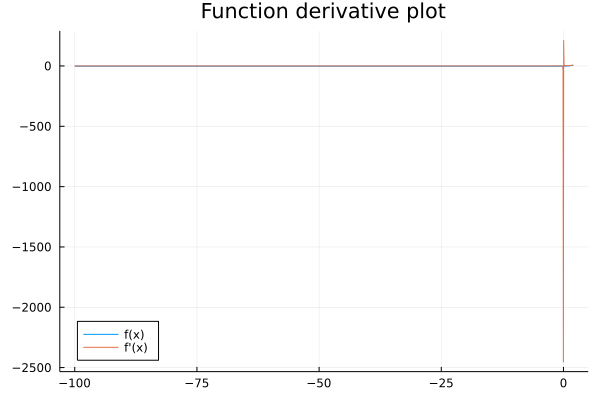

In [18]:
plot!(D(f), -100, 2, label="f'(x)", legend=:bottomleft, title="Function derivative plot")

### metoda falsi

In [19]:
intervalMethod(f, -100, 2)

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 7
* function evaluations ‚âà 9
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = NaN
x‚ÇÇ = 2,	 fx‚ÇÇ = 5.3865563489306503
x‚ÇÉ = 1,	 fx‚ÇÉ = 0.70828382845904503
x‚ÇÑ = 0.5,	 fx‚ÇÑ = -0.39126272929987177
x‚ÇÖ = 0.67792003737310536,	 fx‚ÇÖ = -0.051976380253083806
x‚ÇÜ = 0.70304958843804088,	 fx‚ÇÜ = -0.00032254673380420669
x‚Çá = 0.70320642430343672,	 fx‚Çá = 3.2909672150031964e-06
x‚Çà = 0.70320484025809904,	 fx‚Çà = -2.1823585653897419e-10
x‚Çâ = 0.7032048403631358,	 fx‚Çâ = 1.7390094626899139e-16



Algorithm has not been run

In [20]:
iszero(f(0.7032048403631358))

false

### metoda Newtona

In [21]:
derivativeMethod(f, -2)

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: Roots.Newton()
* iterations: 17
* function evaluations ‚âà 34
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = -2,	 fx‚ÇÅ = -1.8671649667633872
x‚ÇÇ = 12.056282279636104,	 fx‚ÇÇ = 172175.68574840715
x‚ÇÉ = 11.056293896009034,	 fx‚ÇÉ = 63339.366551484411
x‚ÇÑ = 10.05632547247647,	 fx‚ÇÑ = 23300.722267245321
x‚ÇÖ = 9.0564113044455024,	 fx‚ÇÖ = 8571.3281939739372
x‚ÇÜ = 8.0566446034357408,	 fx‚ÇÜ = 3152.6869752500625
x‚Çá = 7.0572786416758193,	 fx‚Çá = 1159.2804003614101
x‚Çà = 6.0590011001195618,	 fx‚Çà = 425.94747394693667
x‚Çâ = 5.0636754134945026,	 fx‚Çâ = 156.17040236972571
x‚ÇÅ‚ÇÄ = 4.0763234001448048,	 fx‚ÇÅ‚ÇÄ = 56.927813095536692
x‚ÇÅ‚ÇÅ = 3.1102779366029183,	 fx‚ÇÅ‚ÇÅ = 20.426243245348601
x‚ÇÅ‚ÇÇ = 2.1995281378672287,	 fx‚ÇÅ‚ÇÇ = 7.0186891275544747
x‚ÇÅ‚ÇÉ = 1.4216302193257353,	 fx‚ÇÅ‚ÇÉ = 2.1389230844680029
x‚ÇÅ‚ÇÑ = 0.90633010909741363,	 fx‚ÇÅ‚ÇÑ = 0.463050

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: Roots.Newton()
* iterations: 17
* function evaluations ‚âà 34
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = -2,	 fx‚ÇÅ = -1.8671649667633872
x‚ÇÇ = 12.056282279636104,	 fx‚ÇÇ = 172175.68574840715
x‚ÇÉ = 11.056293896009034,	 fx‚ÇÉ = 63339.366551484411
x‚ÇÑ = 10.05632547247647,	 fx‚ÇÑ = 23300.722267245321
x‚ÇÖ = 9.0564113044455024,	 fx‚ÇÖ = 8571.3281939739372
x‚ÇÜ = 8.0566446034357408,	 fx‚ÇÜ = 3152.6869752500625
x‚Çá = 7.0572786416758193,	 fx‚Çá = 1159.2804003614101
x‚Çà = 6.0590011001195618,	 fx‚Çà = 425.94747394693667
x‚Çâ = 5.0636754134945026,	 fx‚Çâ = 156.17040236972571
x‚ÇÅ‚ÇÄ = 4.0763234001448048,	 fx‚ÇÅ‚ÇÄ = 56.927813095536692
x‚ÇÅ‚ÇÅ = 3.1102779366029183,	 fx‚ÇÅ‚ÇÅ = 20.426243245348601
x‚ÇÅ‚ÇÇ = 2.1995281378672287,	 fx‚ÇÅ‚ÇÇ = 7.0186891275544747
x‚ÇÅ‚ÇÉ = 1.4216302193257353,	 fx‚ÇÅ‚ÇÉ = 2.1389230844680029
x‚ÇÅ‚ÇÑ = 0.90633010909741363,	 fx‚ÇÅ‚ÇÑ = 0.463050

In [22]:
iszero(f(0.7032048403631358))

false

In [23]:
derivativeMethod(f, 0.01)

Results of univariate zero finding:

* Converged to: 0.7032048403631357
* Algorithm: Roots.Newton()
* iterations: 11
* function evaluations ‚âà 22
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0.01,	 fx‚ÇÅ = -98.989949832915812
x‚ÇÇ = 0.015102309084782075,	 fx‚ÇÇ = -44.248467667422744
x‚ÇÉ = 0.022876133399301266,	 fx‚ÇÉ = -19.918655631008562
x‚ÇÑ = 0.034949865163729069,	 fx‚ÇÑ = -9.1042861126420238
x‚ÇÖ = 0.054508076811668665,	 fx‚ÇÖ = -4.2973518599366658
x‚ÇÜ = 0.089200292999004449,	 fx‚ÇÜ = -2.160686113208873
x‚Çá = 0.16325246934381243,	 fx‚Çá = -1.1974216827717397
x‚Çà = 0.3709350046853207,	 fx‚Çà = -0.62355016047019196
x‚Çâ = 0.7097036783745303,	 fx‚Çâ = 0.013540324693123695
x‚ÇÅ‚ÇÄ = 0.70322292948465492,	 fx‚ÇÅ‚ÇÄ = 3.7584197802527644e-05
x‚ÇÅ‚ÇÅ = 0.70320484050290732,	 fx‚ÇÅ‚ÇÅ = 2.9040456015828783e-10
x‚ÇÅ‚ÇÇ = 0.70320484036313569,	 fx‚ÇÅ‚ÇÇ = -2.7365771053302484e-16



Results of univariate zero finding:

* Converged to: 0.7032048403631357
* Algorithm: Roots.Newton()
* iterations: 11
* function evaluations ‚âà 22
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0.01,	 fx‚ÇÅ = -98.989949832915812
x‚ÇÇ = 0.015102309084782075,	 fx‚ÇÇ = -44.248467667422744
x‚ÇÉ = 0.022876133399301266,	 fx‚ÇÉ = -19.918655631008562
x‚ÇÑ = 0.034949865163729069,	 fx‚ÇÑ = -9.1042861126420238
x‚ÇÖ = 0.054508076811668665,	 fx‚ÇÖ = -4.2973518599366658
x‚ÇÜ = 0.089200292999004449,	 fx‚ÇÜ = -2.160686113208873
x‚Çá = 0.16325246934381243,	 fx‚Çá = -1.1974216827717397
x‚Çà = 0.3709350046853207,	 fx‚Çà = -0.62355016047019196
x‚Çâ = 0.7097036783745303,	 fx‚Çâ = 0.013540324693123695
x‚ÇÅ‚ÇÄ = 0.70322292948465492,	 fx‚ÇÅ‚ÇÄ = 3.7584197802527644e-05
x‚ÇÅ‚ÇÅ = 0.70320484050290732,	 fx‚ÇÅ‚ÇÅ = 2.9040456015828783e-10
x‚ÇÅ‚ÇÇ = 0.70320484036313569,	 fx‚ÇÅ‚ÇÇ = -2.7365771053302484e-16



In [24]:
iszero(f(0.7032048403631357))

false

In [25]:
derivativeMethod(f, 0.000000001)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x‚ÇÅ = 1.0000000000000001e-09,	 fx‚ÇÅ = 1.9999899999999995e+21
x‚ÇÇ = 1.3333327777759259e-09,	 fx‚ÇÇ = 8.4374542968720694e+20
x‚ÇÉ = 1.7777760493766803e-09,	 fx‚ÇÉ = 3.5595490539499972e+20
x‚ÇÑ = 2.3703663099986788e-09,	 fx‚ÇÑ = 1.5016836447656218e+20
x‚ÇÖ = 3.1604852918422173e-09,	 fx‚ÇÖ = 6.3352216192639828e+19
x‚ÇÜ = 4.2139748398048947e-09,	 fx‚ÇÜ = 2.6726681010040422e+19
x‚Çá = 5.6186232542768666e-09,	 fx‚Çá = 1.1275298753162193e+19
x‚Çà = 7.4914801337477496e-09,	 fx‚Çà = 4.7567555250920591e+18
x‚Çâ = 9.9886089985102812e-09,	 fx‚Çâ = 2.0067499728850952e+18
x‚ÇÅ‚ÇÄ = 1.3318089900440491e-08,	 fx‚ÇÅ‚ÇÄ = 8.4659412113356506e+17
x‚ÇÅ‚ÇÅ = 1.7757354656480036e-08,	 fx‚ÇÅ‚ÇÅ = 3.5715491276272352e+17
x‚ÇÅ‚ÇÇ = 2.3676297685134562e-08,	 fx‚ÇÅ‚ÇÇ = 1.506736138793689e+17
x‚ÇÅ‚ÇÉ = 3.1568085462781598e-08,	 fx‚ÇÅ‚ÇÉ = 63564803687881120
x‚ÇÅ‚ÇÑ = 4.2090226923212067e-08,	 fx‚ÇÅ‚ÇÑ = 26816048764837364
x‚ÇÅ

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

### metoda siecznych

In [26]:
derivativeApproxMethod(f, -5)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 2
* function evaluations ‚âà 4
* Note: Used bracketing method AlefeldPotraShi() on  [-5.0,298.0822359033467]

Trace:
x‚ÇÅ = -4.9999939443622052,	 fx‚ÇÅ = -1.9936620291671865
x‚ÇÇ = -5,	 fx‚ÇÇ = -1.9936620690009146
x‚ÇÉ = 298.08223590334671,	 fx‚ÇÉ = 2.8541067075185228e+129
(a‚ÇÉ, b‚ÇÉ) = ( -5, 298.08223590334671 )
(a‚ÇÑ, b‚ÇÑ) = ( 0, 298.08223590334671 )



Algorithm has not been run

<h2 style="color:red"> 0 nie nalezy do dziedziny </h2>

In [27]:
derivativeApproxMethod(f, 0.0001)

Results of univariate zero finding:

* Converged to: 0.00019999920016961132
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 13
* function evaluations ‚âà 18
* stopped as x_n ‚âà x_{n-1} using atol=xatol, rtol=xrtol
* Note: Used bracketing method AlefeldPotraShi() on  [0.00019999920015762444,0.0001999992002208157]

Trace:
x‚ÇÅ = 0.0001060554544560602,	 fx‚ÇÅ = 787538.8562873624
x‚ÇÇ = 0.0001,	 fx‚ÇÇ = 999999.00010000472
x‚ÇÉ = 0.00012850157348359559,	 fx‚ÇÉ = 336953.41233361757
x‚ÇÑ = 0.00014298579993705417,	 fx‚ÇÑ = 195030.29636042478
x‚ÇÖ = 0.00016288997804362213,	 fx‚ÇÖ = 85862.407169067359
x‚ÇÜ = 0.00017854495367437817,	 fx‚ÇÜ = 37694.25787968986
x‚Çá = 0.00019079584346839634,	 fx‚Çá = 13250.873282310902
x‚Çà = 0.00019743710820852966,	 fx‚Çà = 3328.9978379574022
x‚Çâ = 0.00019966539217411688,	 fx‚Çâ = 419.36632102692965
x‚ÇÅ‚ÇÄ = 0.00019998655560784178,	 fx‚ÇÅ‚ÇÄ = 15.809079754078994
x‚ÇÅ‚ÇÅ = 0.00019999913696636687,	 fx‚ÇÅ‚ÇÅ = 0.0790060261497

Algorithm has not been run

In [28]:
iszero(f(0.00019999920016961132))

false

Rozbili≈õmy bank, nic nie dzia≈Ça :)

#### 3. Dla ka≈ºdej z wybranych metod zademonstrowaƒá i wyja≈õniƒá po jednym  przyk≈Çadzie, dla kt√≥rego nie dzia≈ÇajƒÖ (mo≈ºna na podstawie p.1 lub wymy≈õliƒá w≈Çasny)(1 pkt)

### intervalMethod

In [29]:
f(x) = sin(x)
a, b = 0.05, 6.5
intervalMethod(f, a, b)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



Natomiast pierwiastek w tym przedziale jest...

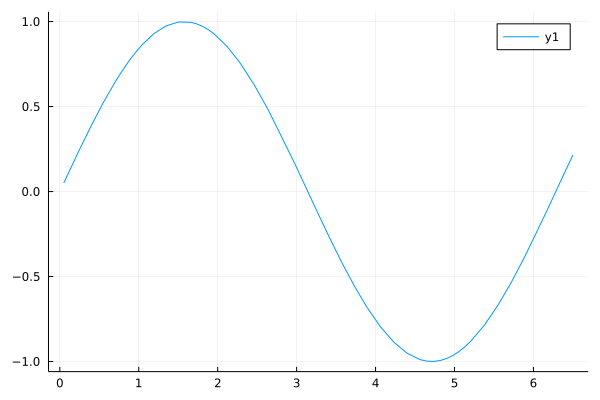

In [30]:
plot(f, a, b)

Metoda nie dzia≈Ça, poniewa≈º warto≈õci na kra≈Ñcach oraz w jego ≈õrodku sƒÖ tego samego znaku (algorytm opiera siƒô na fakcie, ≈ºe dla funkcji ciƒÖg≈Çej w przedziale [a,b] o r√≥≈ºnych znakach na jego ko≈Ñcu funkcja w tym przedziale ma pierwiastek).

### derivativeMethod

In [31]:
f(x) = x^3 - 2*x + 2
startX = 1
derivativeMethod(f, startX)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x‚ÇÅ = 1,	 fx‚ÇÅ = 1
x‚ÇÇ = 0,	 fx‚ÇÇ = 2
x‚ÇÉ = 1,	 fx‚ÇÉ = 1
x‚ÇÑ = 0,	 fx‚ÇÑ = 2
x‚ÇÖ = 1,	 fx‚ÇÖ = 1
x‚ÇÜ = 0,	 fx‚ÇÜ = 2
x‚Çá = 1,	 fx‚Çá = 1
x‚Çà = 0,	 fx‚Çà = 2
x‚Çâ = 1,	 fx‚Çâ = 1
x‚ÇÅ‚ÇÄ = 0,	 fx‚ÇÅ‚ÇÄ = 2
x‚ÇÅ‚ÇÅ = 1,	 fx‚ÇÅ‚ÇÅ = 1
x‚ÇÅ‚ÇÇ = 0,	 fx‚ÇÅ‚ÇÇ = 2
x‚ÇÅ‚ÇÉ = 1,	 fx‚ÇÅ‚ÇÉ = 1
x‚ÇÅ‚ÇÑ = 0,	 fx‚ÇÅ‚ÇÑ = 2
x‚ÇÅ‚ÇÖ = 1,	 fx‚ÇÅ‚ÇÖ = 1
x‚ÇÅ‚ÇÜ = 0,	 fx‚ÇÅ‚ÇÜ = 2
x‚ÇÅ‚Çá = 1,	 fx‚ÇÅ‚Çá = 1
x‚ÇÅ‚Çà = 0,	 fx‚ÇÅ‚Çà = 2
x‚ÇÅ‚Çâ = 1,	 fx‚ÇÅ‚Çâ = 1
x‚ÇÇ‚ÇÄ = 0,	 fx‚ÇÇ‚ÇÄ = 2
x‚ÇÇ‚ÇÅ = 1,	 fx‚ÇÇ‚ÇÅ = 1
x‚ÇÇ‚ÇÇ = 0,	 fx‚ÇÇ‚ÇÇ = 2
x‚ÇÇ‚ÇÉ = 1,	 fx‚ÇÇ‚ÇÉ = 1
x‚ÇÇ‚ÇÑ = 0,	 fx‚ÇÇ‚ÇÑ = 2
x‚ÇÇ‚ÇÖ = 1,	 fx‚ÇÇ‚ÇÖ = 1
x‚ÇÇ‚ÇÜ = 0,	 fx‚ÇÇ‚ÇÜ = 2
x‚ÇÇ‚Çá = 1,	 fx‚ÇÇ‚Çá = 1
x‚ÇÇ‚Çà = 0,	 fx‚ÇÇ‚Çà = 2
x‚ÇÇ‚Çâ = 1,	 fx‚ÇÇ‚Çâ = 1
x‚ÇÉ‚ÇÄ = 0,	 fx‚ÇÉ‚ÇÄ = 2
x‚ÇÉ‚ÇÅ = 1,	 fx‚ÇÉ‚ÇÅ = 1
x‚ÇÉ‚ÇÇ = 0,	 fx‚ÇÉ‚ÇÇ = 2
x‚ÇÉ‚ÇÉ = 1,	 fx‚ÇÉ‚ÇÉ = 1
x‚ÇÉ‚ÇÑ = 0,	 fx‚ÇÉ‚ÇÑ = 2
x‚ÇÉ‚ÇÖ = 1,	 fx‚ÇÉ‚ÇÖ = 1
x‚ÇÉ‚ÇÜ = 0,	 

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

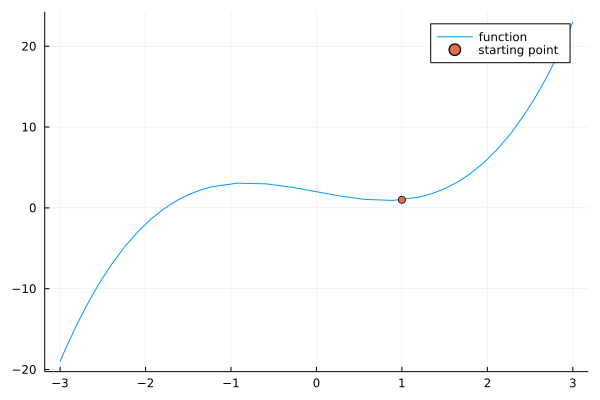

In [32]:
plot(f, -3, 3, label="function")
scatter!([startX], [f(startX)], label="starting point")

W metodzie Newtona przyjmuje siƒô nastƒôpujƒÖce za≈Ço≈ºenia dla funkcji f:

- W przedziale [a,b] znajduje siƒô dok≈Çadnie jeden pierwiastek.
- Funkcja ma r√≥≈ºne znaki na kra≈Ñcach przedzia≈Çu, $${\displaystyle f(a)\cdot f(b)<0.}$$ 
- Pierwsza i druga pochodna funkcji majƒÖ sta≈Çy znak w tym przedziale.

Jak widzimy po wykresie, funkcja nie jest monotoniczna, zatem trzecie za≈Ço≈ºenie jest fa≈Çszywe (powoduje to, ≈ºe algorytm wykonuje wahania na ma≈Çym przedziale, starajƒÖc siƒô znale≈∫ƒá minimum)

### derivativeApproxMethod

In [33]:
f(x) = (x^2 + 2x + 2)/(x^2 - 2x + 2) - 5
startX = -1.8
derivativeApproxMethod(f, startX)

Results of univariate zero finding:

* Converged to: -6.236647047591709e16
* Algorithm: Secant()
* iterations: 12
* function evaluations ‚âà 16
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = -1.7999939444795443,	 fx‚ÇÅ = -4.8144800223586826
x‚ÇÇ = -1.8,	 fx‚ÇÇ = -4.8144796380090495
x‚ÇÉ = -1.8006055520455739,	 fx‚ÇÉ = -4.8144411838227317
x‚ÇÑ = -1.8611607566029627,	 fx‚ÇÑ = -4.8104123468578956
x‚ÇÖ = -7.9166812123418344,	 fx‚ÇÖ = -4.3933402644477217
x‚ÇÜ = -71.704124588186062,	 fx‚ÇÜ = -4.0542505164443723
x‚Çá = -834.36438421546359,	 fx‚Çá = -4.0047825907122032
x‚Çà = -62577.170155373184,	 fx‚Çà = -4.000063919032292
x‚Çâ = -6236857.7472711457,	 fx‚Çâ = -4.0000006413483966
x‚ÇÅ‚ÇÄ = -623664915.45884836,	 fx‚ÇÅ‚ÇÄ = -4.0000000064137007
x‚ÇÅ‚ÇÅ = -62366470686.616562,	 fx‚ÇÅ‚ÇÅ = -4.0000000000641371
x‚ÇÅ‚ÇÇ = -6236647047802.3877,	 fx‚ÇÅ‚ÇÇ = -4.0000000000006413
x‚ÇÅ‚ÇÉ = -623664704759379.5,	 fx‚ÇÅ‚ÇÉ = -4.0000000000000062
x‚ÇÅ‚ÇÑ = -62366470475917088,

Algorithm has not been run

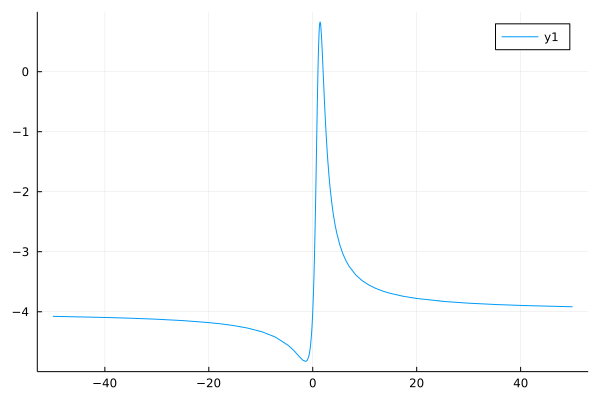

In [34]:
plot(f, -50, 50)

In [35]:
f(-6.236647047591709e16)

-4.0

$$x_0 = a$$
$$x_1 = b$$
$$x_{n+1} = \frac{f(x_n)x_{n-1} - f(x_{n-1})x_n}{f(x_n) - f(x_{n-1})}$$

Jak widaƒá po stackTrace, r√≥≈ºnica warto≈õci funkcji $x_n$ i $x_{n+1}$ jest tak ma≈Ça, ≈ºe nowe $x_n$ jest ≈∫le obliczane.